In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [61]:
import idx2numpy

train_images = idx2numpy.convert_from_file("/kaggle/input/mnist-dataset/train-images.idx3-ubyte")
train_labels = idx2numpy.convert_from_file("/kaggle/input/mnist-dataset/train-labels.idx1-ubyte")

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_images = scaler.fit_transform(train_images.reshape(-1, 28*28)).reshape(-1, 28, 28)

In [63]:
model=Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(x=train_images,y=train_labels,batch_size=10,epochs=25,verbose=2)

Epoch 1/25
6000/6000 - 9s - 1ms/step - accuracy: 0.9415 - loss: 0.1928
Epoch 2/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9724 - loss: 0.0904
Epoch 3/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9798 - loss: 0.0652
Epoch 4/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9840 - loss: 0.0516
Epoch 5/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9871 - loss: 0.0409
Epoch 6/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9885 - loss: 0.0363
Epoch 7/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9904 - loss: 0.0316
Epoch 8/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9916 - loss: 0.0278
Epoch 9/25
6000/6000 - 8s - 1ms/step - accuracy: 0.9924 - loss: 0.0255
Epoch 10/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9932 - loss: 0.0234
Epoch 11/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9933 - loss: 0.0243
Epoch 12/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9938 - loss: 0.0214
Epoch 13/25
6000/6000 - 8s - 1ms/step - accuracy: 0.9943 - loss: 0.0216
Epoch 14/25
6000/6000 - 7s - 1ms/step - accuracy: 0.9947 - loss: 0.0196
E

In [67]:
import idx2numpy

test_images= idx2numpy.convert_from_file("/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte")
test_labels= idx2numpy.convert_from_file("/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte")

In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))
test_images = scaler.fit_transform(test_images.reshape(-1, 28*28)).reshape(-1, 28, 28)

In [69]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9798 - loss: 0.2248
Test Accuracy: 0.9798
Test Loss: 0.2248


## Testing the model with a particular example:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


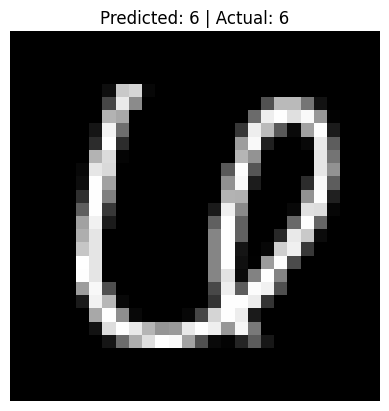

In [71]:
import matplotlib.pyplot as plt

# Select a random test sample index
index = np.random.randint(0, len(test_images))
pred_probs = model.predict(test_images[index].reshape(1, 28, 28))
pred_label = np.argmax(pred_probs)  #
true_label = test_labels[index]
plt.imshow(test_images[index], cmap='gray')
plt.title(f"Predicted: {pred_label} | Actual: {true_label}")
plt.axis('off')
plt.show()
